### 다중 분류의 평가 지표

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0
)
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
pred = lr.predict(X_test)
print(f'acc: {accuracy_score(y_test, pred):.3f}')
print(f'confusion matrix:\n{confusion_matrix(y_test, pred)}')

acc: 0.953
confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


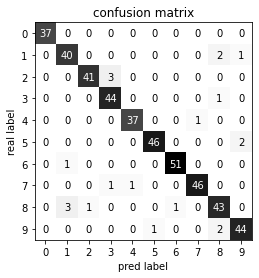

In [4]:
import mglearn
import matplotlib.pyplot as plt

scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred),
    xlabel='pred label',
    ylabel='real label',
    xticklabels=digits.target_names,
    yticklabels=digits.target_names,
    cmap=plt.cm.gray_r,
    fmt='%d'
)
plt.title('confusion matrix')
plt.gca().invert_yaxis()

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



* 다중 클래스용 f1 score는 한 클래스를 양성 클래스로 두고 나며지 클래스들을 음성 클래스로 간주하여 클래스마다 f1 score를 계산.
* 클래스별 f1 score를 다음 전략 중 하나를 사용하여 평균을 낸다.
    * macro: 클래스별 f1 score에 가중치를 주지 않는다. 클래스 크기에 상관없이 모든 클래스를 같은 비중으로 다룬다.
    * weighted: 클래스별 샘플 수로 가중치를 두어 f1 score의 평균을 계산.
    * micro: 모든 클래스의 거짓 양성(FP), 거짓 음성(FN), 진짜 양성(TP)의 총 수를 헤아린 다음 정밀도, 재현율, f1 score를 이 수치로 계산.
* 각 샘플을 땆같이 간주한다면 "micro" 평균 f1 점수
* 각 클래스를 동일한 비중으로 고러한다면 "macro" 평균 f1 점수 추천.

In [8]:
from sklearn.metrics import f1_score

print(f'micro avg f1 score: {f1_score(y_test, pred, average="micro")}')
print(f'macro avg f1 score: {f1_score(y_test, pred, average="macro")}')

micro avg f1 score: 0.9533333333333334
macro avg f1 score: 0.9542564253775861


### 회귀의 평가 지표
* 대부분의 애플리케이션에서는 회귀 추정기의 score 메서드에서 이용하는 $R^2$만으로 충분하다.

### 모델 선택에서 평가 지표 사용하기

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

print('default metric:', cross_val_score(SVC(), digits.data, digits.target == 9, cv=5))
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring='accuracy', cv=5)
print('acc:', explicit_accuracy)
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring='roc_auc', cv=5)
print('avg precision:', roc_auc)

default metric: [0.975      0.99166667 1.         0.99442897 0.98050139]
acc: [0.975      0.99166667 1.         0.99442897 0.98050139]
avg precision: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [14]:
import pandas as pd
from sklearn.model_selection import cross_validate

res = cross_validate(SVC(), digits.data, digits.target == 9, scoring=['accuracy', 'roc_auc', 'recall_macro'], return_train_score=True, cv=5)
pd.DataFrame(res)

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.009510,0.005358,0.975000,0.994433,0.997171,0.998679,0.887346,0.972222
1,0.009336,0.003512,0.991667,0.995825,0.998543,0.999141,0.958333,0.982252
2,0.013189,0.004507,1.000000,0.995132,1.000000,0.998975,1.000000,0.978780
3,0.008566,0.004518,0.994429,0.995828,0.999828,0.998825,0.972222,0.982252
4,0.008017,0.005524,0.980501,0.996523,0.984004,0.999914,0.902778,0.985725


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)

# 일부러 적절하지 않은 그리드를 만든다.
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)
print('acc')
print('best parameters:', grid.best_params_)
print('best cross validation score:', grid.best_score_)
print('test set avg precision:', average_precision_score(y_test, grid.decision_function(X_test)))
print('test set acc:', grid.score(X_test, y_test))

acc
best parameters: {'gamma': 0.0001}
best cross validation score: 0.971789161098738
test set avg precision: 0.9656749529729884
test set acc: 0.9733333333333334


In [16]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='average_precision', cv=3)
grid.fit(X_train, y_train)
print('avg precision')
print('best parameters:', grid.best_params_)
print('best cross validation score(avg precision):', grid.best_score_)
print('test set avg precision:', average_precision_score(y_test, grid.decision_function(X_test)))
print('test set acc:', grid.score(X_test, y_test))

avg precision
best parameters: {'gamma': 0.01}
best cross validation score(avg precision): 0.9848054272142445
test set avg precision: 0.9958247456096899
test set acc: 0.9958247456096899


## 요약 및 정리
* 교차 검증을 해야 한다.
    * 모델 학습에는 훈련 데이터로
    * 모델과 매개변수 선택에는 검증 데이터로
    * 모델 평가에는 테스트 데이터로 분리해서 서용해야 한다.
    * 가장 널리 사용하는 구성은 훈련 세트와 테스트 세트로 분할하고 모델과 모델 개매변수 선택을 위해 훈련 세트에 교차 검증을 적용하는 방식
* 모델 선택과 평가에 사용하는 평가 지표와 방법이 중요하다.